In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uci-secom.csv")
df.shape

(1567, 592)

In [3]:
df.head(1)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [6]:
label_name = "Pass/Fail"

In [7]:
label_one_count = (df[label_name] == 1).sum()
label_one_count

104

In [8]:
df_label_not_one = df[df[label_name] == -1].sample(label_one_count)

In [9]:
df_under = pd.concat([df_label_not_one,  df[df[label_name] == 1]])
df_under.shape

(208, 592)

In [10]:
df_under[label_name].value_counts()

Pass/Fail
-1    104
 1    104
Name: count, dtype: int64

In [11]:
(df_under[label_name] == 1).astype(int)

255     0
1082    0
635     0
1374    0
463     0
       ..
1365    1
1400    1
1438    1
1443    1
1519    1
Name: Pass/Fail, Length: 208, dtype: int64

In [12]:
X, y = df_under.drop(columns=[label_name, "Time"]), (df_under[label_name] == 1).astype(int)
X.shape, y.shape

((208, 590), (208,))

<Axes: >

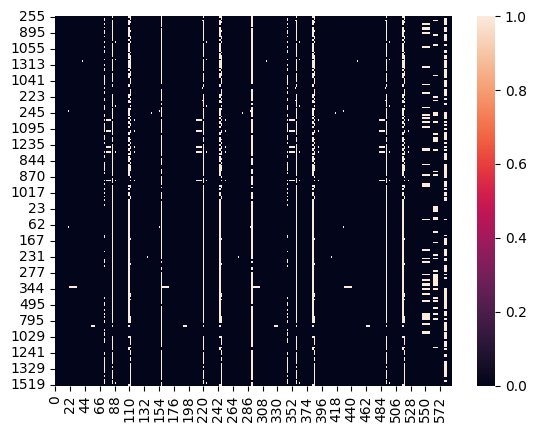

In [13]:
sns.heatmap(X.isnull())

## 결측치 채우기

In [14]:
X = X.fillna(0)
X.isnull().sum().sum()

0

## data split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42)

X_train.shape

(187, 590)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# val_loss 기준으로 값이 나아지지 않으면 멈추개 합니다.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [18]:
history = model.fit(X_train, y_train, validation_split=0.1, 
                    epochs=1000, verbose=0, callbacks=[early_stop, PrintDot()])


....................................................................................................
........................

In [19]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
119,0.464117,0.779762,16.210983,0.368421
120,0.545203,0.714286,14.846908,0.473684
121,0.499204,0.702381,13.456685,0.368421
122,0.577338,0.744048,15.590674,0.368421
123,0.547968,0.755952,15.811276,0.421053


<Axes: >

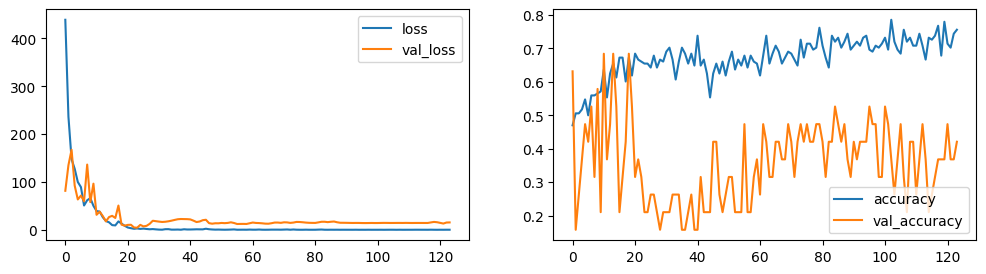

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["accuracy", "val_accuracy"]].plot(ax=axes[1])